In [1]:
import pandas as pd
import re
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_data = pd.read_excel("Budget_file.xlsx", sheet_name = "Sheet1")
df_data

,Date,Narration,Ref_no,Value_dt,Withdrawl,Deposit,Closing Balance
0,01/07/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000218249800677,01/07/22,20.0,NaN,34304.26
1,02/07/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000218327074783,02/07/22,21.0,NaN,34283.26
2,03/07/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000218430894428,03/07/22,20.0,NaN,34263.26
3,03/07/22,UPI-NARESH PUROHIT-NP1784534@OKHDFCBANK-HDFC00...,0000218435006946,03/07/22,20.0,NaN,34243.26
4,04/07/22,UPI-KRISHNA VEGETABLES A-PAYTMQR281005050101OG...,0000218563429825,04/07/22,25.0,NaN,34218.26
...,...,...,...,...,...,...,...
505,31/12/22,UPI-HAIR GLOW-9819103125@OKBIZAXIS-UTIB0000000...,0000236595133822,31/12/22,800.0,NaN,95992.53
506,31/12/22,05432150000051-007188242,0000212311762603,31/12/22,NaN,1403.39,97395.92
507,31/12/22,UPI-MAHAVIR THE HOME STO-Q80990057@YBL-YESB0YB...,0000236507176614,31/12/22,2998.0,NaN,94397.92
508,31/12/22,UPI-AAYUSHI SUPER SHOPPY-Q392022159@YBL-YESB0Y...,0000236509057794,31/12/22,158.0,NaN,94239.92


In [3]:
df_data_withdrawl = df_data.dropna(subset=['Withdrawl'])
df_data_deposit = df_data.dropna(subset=['Deposit'])
df_data_withdrawl.shape,df_data_deposit.shape

((467, 7), (43, 7))

In [4]:
def clean_narration(text):
    clean_text = re.sub(r"@.*", "", text)
    clean_text = re.sub(r"[^A-Za-z\s]", " ", clean_text)
    clean_text = re.sub("UPI","", clean_text)
    clean_text = re.sub(' +', ' ', clean_text)
    clean_text = clean_text.lower()

    return clean_text

In [5]:
df_data_withdrawl

,Date,Narration,Ref_no,Value_dt,Withdrawl,Deposit,Closing Balance
0,01/07/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000218249800677,01/07/22,20.0,NaN,34304.26
1,02/07/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000218327074783,02/07/22,21.0,NaN,34283.26
2,03/07/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000218430894428,03/07/22,20.0,NaN,34263.26
3,03/07/22,UPI-NARESH PUROHIT-NP1784534@OKHDFCBANK-HDFC00...,0000218435006946,03/07/22,20.0,NaN,34243.26
4,04/07/22,UPI-KRISHNA VEGETABLES A-PAYTMQR281005050101OG...,0000218563429825,04/07/22,25.0,NaN,34218.26
...,...,...,...,...,...,...,...
503,30/12/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000236446125381,30/12/22,36.0,NaN,96832.53
504,31/12/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000236564094995,31/12/22,40.0,NaN,96792.53
505,31/12/22,UPI-HAIR GLOW-9819103125@OKBIZAXIS-UTIB0000000...,0000236595133822,31/12/22,800.0,NaN,95992.53
507,31/12/22,UPI-MAHAVIR THE HOME STO-Q80990057@YBL-YESB0YB...,0000236507176614,31/12/22,2998.0,NaN,94397.92


In [6]:
df_data_withdrawl["clean_narration"]=df_data_withdrawl["Narration"].apply(clean_narration)
df_data_withdrawl

C:\Users\talkt\AppData\Local\Temp\ipykernel_48836\1672650031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_withdrawl["clean_narration"]=df_data_withdrawl["Narration"].apply(clean_narration)


,Date,Narration,Ref_no,Value_dt,Withdrawl,Deposit,Closing Balance,clean_narration
0,01/07/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000218249800677,01/07/22,20.0,NaN,34304.26,jar save daily jarmyjaronline
1,02/07/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000218327074783,02/07/22,21.0,NaN,34283.26,jar save daily jarmyjaronline
2,03/07/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000218430894428,03/07/22,20.0,NaN,34263.26,jar save daily jarmyjaronline
3,03/07/22,UPI-NARESH PUROHIT-NP1784534@OKHDFCBANK-HDFC00...,0000218435006946,03/07/22,20.0,NaN,34243.26,naresh purohit np
4,04/07/22,UPI-KRISHNA VEGETABLES A-PAYTMQR281005050101OG...,0000218563429825,04/07/22,25.0,NaN,34218.26,krishna vegetables a paytmqr ogh mjcchzhn
...,...,...,...,...,...,...,...,...
503,30/12/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000236446125381,30/12/22,36.0,NaN,96832.53,jar save daily jarmyjaronline
504,31/12/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000236564094995,31/12/22,40.0,NaN,96792.53,jar save daily jarmyjaronline
505,31/12/22,UPI-HAIR GLOW-9819103125@OKBIZAXIS-UTIB0000000...,0000236595133822,31/12/22,800.0,NaN,95992.53,hair glow
507,31/12/22,UPI-MAHAVIR THE HOME STO-Q80990057@YBL-YESB0YB...,0000236507176614,31/12/22,2998.0,NaN,94397.92,mahavir the home sto q


In [8]:
vect = TfidfVectorizer(ngram_range=(1,3))
documents = df_data_withdrawl["clean_narration"]
vect_text=vect.fit_transform(documents)

In [9]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=25,learning_method='online',random_state=42,max_iter=1) 
lda_top=lda_model.fit_transform(vect_text)

In [11]:
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  1.000000292752154 %
Topic  1 :  1.0000002927502698 %
Topic  2 :  75.99999297397386 %
Topic  3 :  1.0000002927540423 %
Topic  4 :  1.0000002927502898 %
Topic  5 :  1.0000002927471623 %
Topic  6 :  1.000000292746996 %
Topic  7 :  1.0000002927487361 %
Topic  8 :  1.000000292750363 %
Topic  9 :  1.0000002927485339 %
Topic  10 :  1.0000002927519094 %
Topic  11 :  1.0000002927558873 %
Topic  12 :  1.0000002927559508 %
Topic  13 :  1.0000002927486495 %
Topic  14 :  1.000000292764967 %
Topic  15 :  1.0000002927523 %
Topic  16 :  1.0000002927471363 %
Topic  17 :  1.0000002927519827 %
Topic  18 :  1.0000002927502567 %
Topic  19 :  1.000000292748651 %
Topic  20 :  1.000000292748748 %
Topic  21 :  1.0000002927596756 %
Topic  22 :  1.0000002927473 %
Topic  23 :  1.0000002927471896 %
Topic  24 :  1.000000292746992 %


In [15]:
vocab = vect.get_feature_names_out()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:3]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=", ")
    print("\n")

Topic 0: 
esakki, save daily jarmyjaronline, jar save daily, 

Topic 1: 
glow, hair, hair glow, 

Topic 2: 
save daily, jar save, daily jarmyjaronline, 

Topic 3: 
awsp, aeml awsp, aeml, 

Topic 4: 
rajesh lucknowledge, rajesh, si, 

Topic 5: 
raj stores paytmqr, raj stores, stores paytmqr, 

Topic 6: 
gpay, purohit np, naresh purohit, 

Topic 7: 
vegetables paytmqr, autopay si tad, krishna vegetables paytmqr, 

Topic 8: 
hungerbox, hungerbox paytm, paytm, 

Topic 9: 
ccavenues, revv, olafinancialservicesprivatelimited, 

Topic 10: 
ia, of, tirupati chemist, 

Topic 11: 
sumit mohan gupta, sumit mohan, mohan gupta, 

Topic 12: 
jar save, daily jarmyjaronline, save daily jarmyjaronline, 

Topic 13: 
cred, cred club, club, 

Topic 14: 
rd, premjiramjipatel, installment, 

Topic 15: 
kopal, chauhan, chouhan chauhan kopal, 

Topic 16: 
raje, gowda, raje gowda, 

Topic 17: 
premji, patel premji, patel premji paytmqr, 

Topic 18: 
jiofiber, daily jarmyjaronline, babu khan, 

Topic 19: 
super

In [33]:
# set clusters to 10 ( To start with as a test )
k_clusters = 20

c:\project_maverick\Analytics\Expense_analysis\my_jupyter_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\talkt\AppData\Local\Temp\ipykernel_39484\141603176.py:4: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(X_train_vc)
C:\Users\talkt\AppData\Local\Temp\ipykernel_39484\141603176.py:4: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(X_train_vc)
C:\Users\talkt\AppData\Local\Temp\ipykernel_39484\141603176.py:4: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(X_train_vc)
C:\Users\talkt\AppData\Local\Temp\ipykernel_39484\141603176.py:4: Convergen

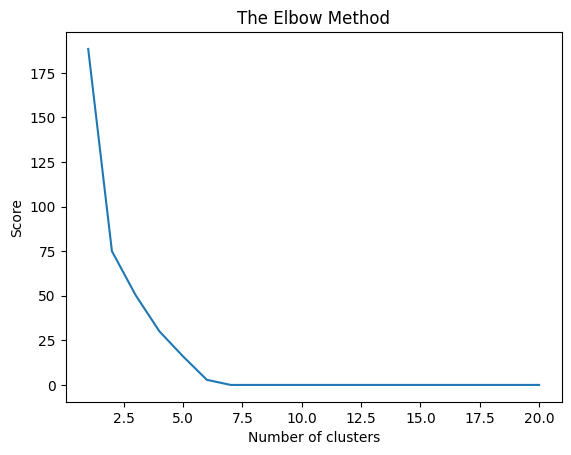

In [34]:
score = []
for i in range(1,k_clusters + 1):
    kmeans = KMeans(n_clusters=i)#,init='k-means++',max_iter=300,n_init=5,random_state=0)
    kmeans.fit(X_train_vc)
    score.append(kmeans.inertia_)
plt.plot(range(1,k_clusters + 1 ),score)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.savefig('elbow.png')
plt.show()

In [136]:
#model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
model = KMeans(n_clusters=k_clusters)
model.fit(X_train_vc)

c:\project_maverick\Analytics\Expense_analysis\my_jupyter_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\talkt\AppData\Local\Temp\ipykernel_45908\1782759640.py:3: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  model.fit(X_train_vc)


KMeans(n_clusters=20)

In [137]:
clusters = model.predict(X_train_vc)

In [138]:
# Create a new column to display the predicted result
df_data_withdrawl["ClusterName"] = clusters
df_data_withdrawl.head(20)

,Date,Narration,Ref_no,Value_dt,Withdrawl,Deposit,Closing Balance,clean_narration,ClusterName
0,01/07/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000218249800677,01/07/22,20.00,NaN,34304.26,jar save daily jarmyjaronline,0
1,02/07/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000218327074783,02/07/22,21.00,NaN,34283.26,jar save daily jarmyjaronline,0
2,03/07/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000218430894428,03/07/22,20.00,NaN,34263.26,jar save daily jarmyjaronline,0
3,03/07/22,UPI-NARESH PUROHIT-NP1784534@OKHDFCBANK-HDFC00...,0000218435006946,03/07/22,20.00,NaN,34243.26,naresh purohit np,2
4,04/07/22,UPI-KRISHNA VEGETABLES A-PAYTMQR281005050101OG...,0000218563429825,04/07/22,25.00,NaN,34218.26,krishna vegetables a paytmqr ogh mjcchzhn,1
5,05/07/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000218650928183,05/07/22,20.00,NaN,34198.26,jar save daily jarmyjaronline,0
6,05/07/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000218622207927,05/07/22,20.00,NaN,34178.26,jar save daily jarmyjaronline,0
7,06/07/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000218727475241,06/07/22,20.00,NaN,34158.26,jar save daily jarmyjaronline,0
8,07/07/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000218870601644,07/07/22,20.00,NaN,34138.26,jar save daily jarmyjaronline,0
9,08/07/22,UPI-JAR SAVE DAILY-JARMYJARONLINE@YBL-YESB0YB...,0000218916681686,08/07/22,20.00,NaN,34118.26,jar save daily jarmyjaronline,0


In [127]:
df_data_withdrawl.to_csv("final_cluster.csv")

In [51]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
vocab = vectorizer.get_feature_names_out()

In [53]:
vocab

array(['aayushi', 'aayushi super', 'ccp', 'ccp wbfm', 'center',
       'center paytmqr', 'daily', 'daily jarmyjaronline', 'dc', 'debit',
       'gpay', 'gpay okbizaxis', 'gupta', 'gupta juice', 'hdfc',
       'hdfcbank', 'hdfcbank hdfc', 'hu', 'hu ccp', 'icic', 'icic dc',
       'icici', 'icici icic', 'idfb', 'imps', 'installment', 'jar',
       'jar save', 'jarmyjaronline', 'jarmyjaronline ybl', 'juice',
       'juice center', 'loan', 'mohan', 'mohan gupta', 'naresh',
       'naresh purohit', 'np', 'np okhdfcbank', 'okbizaxis',
       'okbizaxis utib', 'okhdfcbank', 'okhdfcbank hdfc', 'okicici',
       'payment', 'paytm', 'paytm paytm', 'paytm pytm', 'paytmqr',
       'paytmqr hu', 'purohit', 'purohit np', 'pytm', 'raj', 'rd',
       'rd installment', 'save', 'save daily', 'shoppy', 'shoppy ybl',
       'subscription', 'subscription debit', 'sumit', 'sumit mohan',
       'super', 'super shoppy', 'utib', 'validation', 'vegetables',
       'wbfm', 'wbfm paytm', 'ybl', 'ybl subscription'

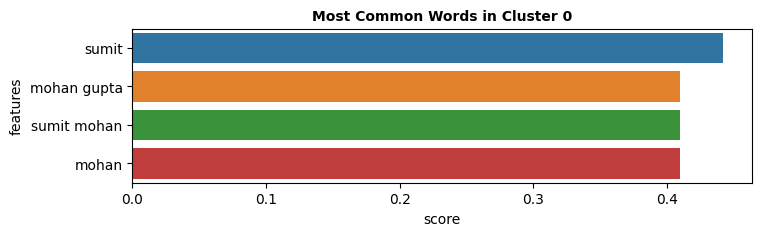

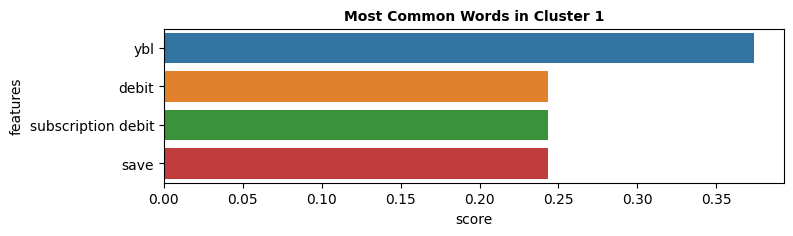

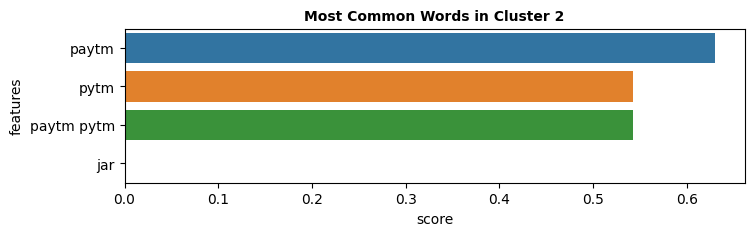

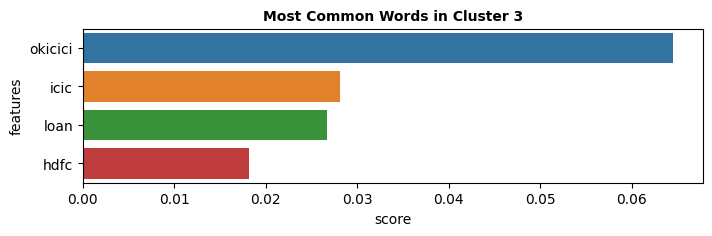

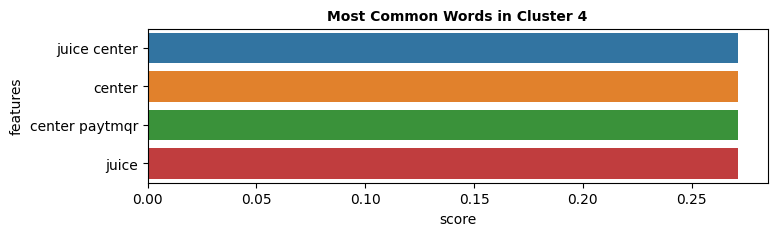

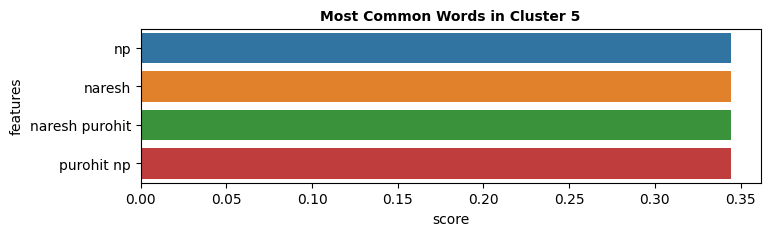

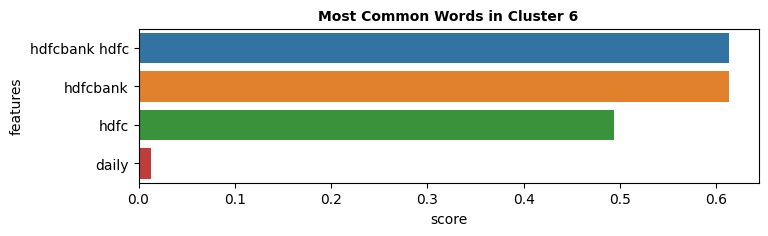

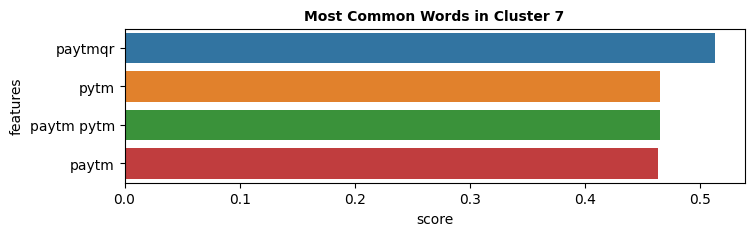

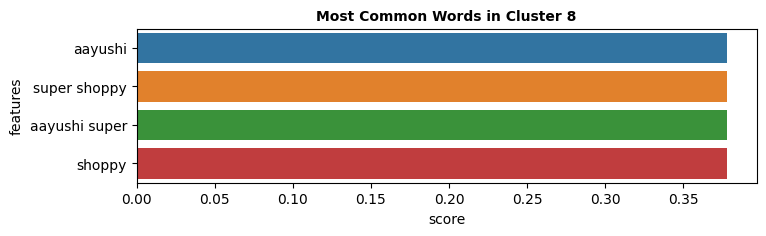

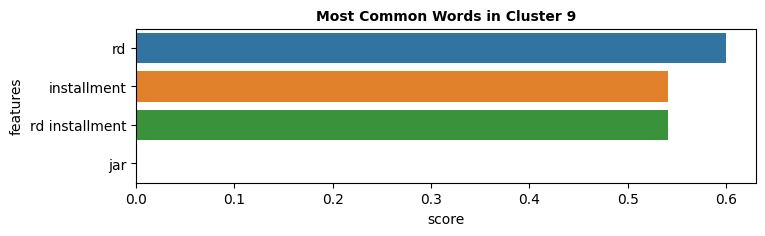

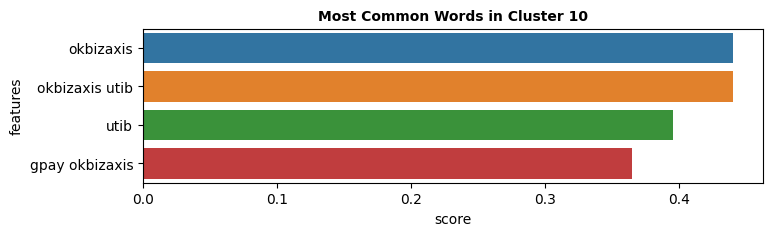

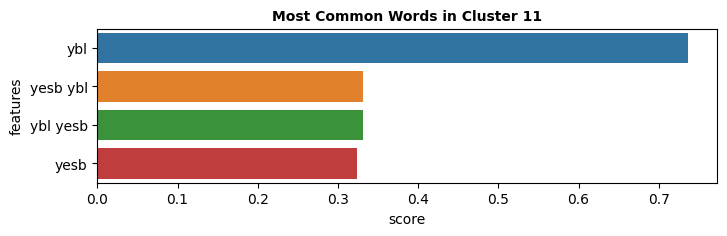

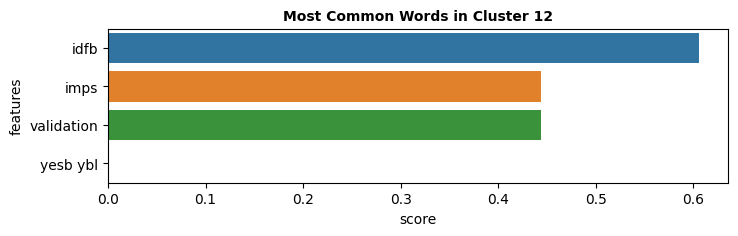

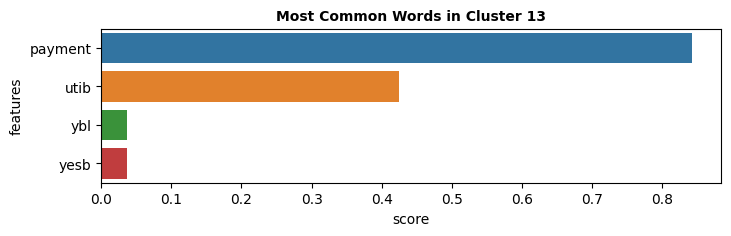

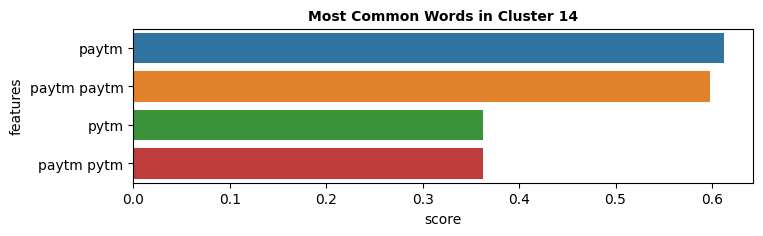

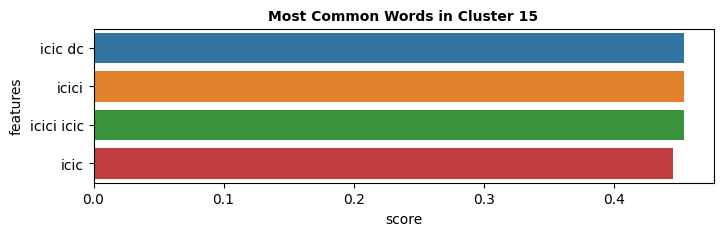

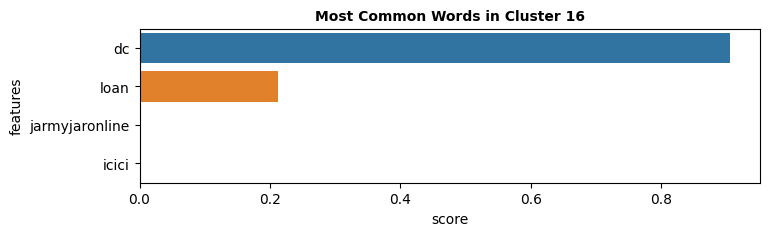

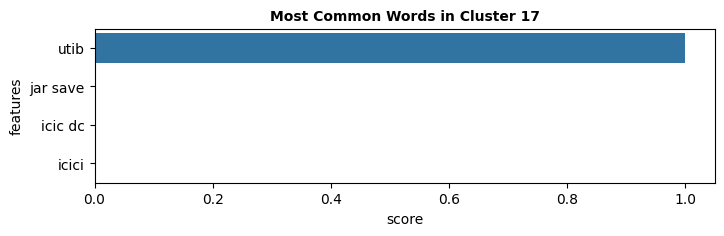

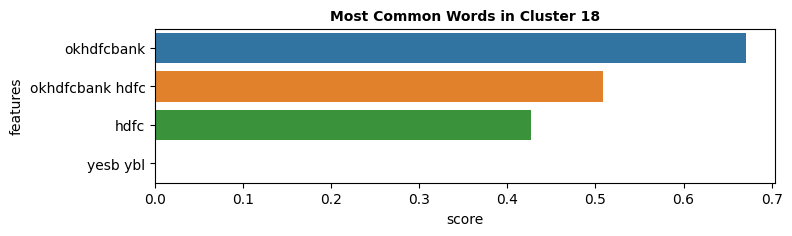

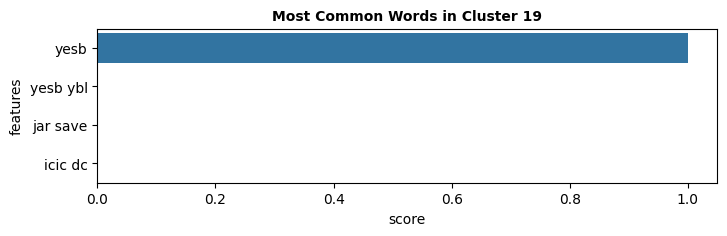

In [54]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs


def plotWords(dfs, n_feats):
    for i in range(0, len(dfs)):
        plt.figure(figsize=(8, 2))
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])

dfs = get_top_features_cluster(X_train_vc.toarray(), clusters, 4)
plotWords(dfs, 4)

In [15]:
kmeans = KMeans(n_clusters=20)
kmeans.fit(vectors)

print(kmeans.labels_)

c:\project_maverick\Analytics\Expense_analysis\my_jupyter_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 1  1  1  8  0  1  1  1  1  1  4  1  7 14  1  1  6  1  1  8  0  6  6  1
  4  0  1  9  9  1  1  1  1  8  0  1  1  1  7  1  1 15 14  1  1  1 12  1
 10  1 13 13 18  1  7  1  1  7  1  1  1  9  0 15  1  7  1 16  0  7  1  1
  7  1  1  6  1 16  1  1  1 16  1  1  1  1  8  1  1  1  1  8  1  1  1  1
  0  7 17  1  1  7  1 10  1 13 13  8 18  1 14  8  8 12  1  7  8  8  1  4
  1  8 16  1  9  0  0  0  1  1  8  1  0  1  1  7  0  1  6  1  1  0  0  6
  1  0  1  8  1  7  1  7  7  0  8  1  1  1  1  1  7  7  8  1 13 18  7  7
  4  1 17  8 18  1  4  1  1  8  1  1 12  7 12  7  1  1 12  1  1  1  9  1
 14  1  7  1 15  7  7  1  1 10 18 10  1  7  7  6  1 15  7  1 15  6  6  6
  1 15  1  7  1  1  1 15 15 12  1  7  1  7  1  1 18  1  7  0  0  1  1  0
  1 19  1  7 15  1 10  4  4  4  1  1  2  1 12 15  8  7  7  1  7  1  0  7
  8  0  7  1  7  7  0  1  9  1  1  7  0  7  3  0  1  0 17  1  7  0  0  0
  3  1  0  0  7  3  7  1 16  7  8  7 11  7  3  1  7  3  7  6  1 12  1  8
  6  1  3  1  3  0  7 13  0  0  1  4  3  1  4  0  3

In [ ]:


text_data = ["This is the first text", "This is the second text", "This is the third text", "This is the fourth text"]
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(text_data)

kmeans = KMeans(n_clusters=2)
kmeans.fit(vectors)

print(kmeans.labels_)